In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
plt.style.use('seaborn-white')
#plt.style.available
#plt.style.use('seaborn-dark-palette')

### Load the interactions summary from Human Promoter Analysis

In [2]:
df = pd.read_csv('Human_Promoter_Analysis_euclidean_v8/Interactions_Results/interactions_summary_attnLimit-0.08.txt',sep='\t')

In [3]:
df.shape

(1399, 12)

In [4]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval
0,filter3<-->filter4,594,M0408_1.02,0.00457,M4536_1.02,0.000552,126.0,462.0,847.0,862.0,0.002045,0.002507
1,filter3<-->filter9,599,M0408_1.02,0.00457,M0891_1.02,0.015908,72.0,180.0,955.0,1308.0,0.132098,0.142225
2,filter3<-->filter11,601,M0408_1.02,0.00457,M1545_1.02,0.000134,48.0,6.0,479.0,1207.0,0.002289,0.002796
3,filter3<-->filter12,602,M0408_1.02,0.00457,M0891_1.02,0.000487,126.0,504.0,1113.0,1177.0,0.000001,0.000002
4,filter3<-->filter18,608,M0408_1.02,0.00457,M1007_1.02,0.002963,42.0,126.0,1213.0,1251.0,0.151519,0.162837


In [5]:
#df = df[(df['motif1_qval'] < 0.01) & (df['motif2_qval']<0.01)]

##### keep significant interactions

In [6]:
df = df[df['adjusted_pval']<0.05]

In [7]:
df.shape

(1309, 12)

In [8]:
df = df[(df['motif1_qval'] < 0.05) & (df['motif2_qval']<0.05)]

In [9]:
df.shape

(1309, 12)

### Load the motif description file to annotate the interactions. 
Here I am using CISBP (U toronto) motif description file. 

In [10]:
df_annotate = pd.read_csv('../Basset_Splicing_IR-iDiffIR/Analysis_For_none_network-typeB_lotus_posThresh-0.60/MEME_analysis/Homo_sapiens_2019_01_14_4_17_pm/TF_Information_all_motifs.txt',sep='\t')

In [11]:
df_annotate.head()

,TF_ID,Family_ID,TSource_ID,Motif_ID,MSource_ID,DBID,TF_Name,TF_Species,TF_Status,Family_Name,...,MSource_Type,MSource_Author,MSource_Year,PMID,MSource_Version,TfSource_Name,TfSource_URL,TfSource_Year,TfSource_Month,TfSource_Day
0,T004843_1.02,F035_1.02,TS19_1.02,M2938_1.02,MS26_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,Transfac,Matys,2006,16381825,2014.2,Ensembl,http://www.ensembl.org/,2011,Oct,26
1,T004843_1.02,F035_1.02,TS19_1.02,M5917_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
2,T004843_1.02,F035_1.02,TS19_1.02,M5918_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
3,T004843_1.02,F035_1.02,TS19_1.02,M5919_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
4,T004843_1.02,F035_1.02,TS19_1.02,M6144_1.02,MS18_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,HocoMoco,Kulakovskiy,2013,23175603,July 2014,Ensembl,http://www.ensembl.org/,2011,Oct,26


In [12]:
def get_annotation(motif_A, annotation_data=None, single_TF = False):
    #motif_A, motif_B = interaction.split('<-->')
    #print(motif_A)
    #print('there')
    TF_A = annotation_data[annotation_data['Motif_ID']==motif_A]['TF_Name']
    #TF_B = annotation_data[annotation_data['Motif_ID']==motif_B]['TF_Name']
    
    ##--If there is no annotation for a given motif--##
    #if len(TF_A)==0:
    TF_A = list(TF_A)
    #if len(TF_B)==0:
    #    TF_B = pd.Series([motif_B])
    ###################################################
    
    if single_TF:
        return TF_A[0]
    else:
        return ','.join(TF_A)
    #print('here')
    #return TF_A

In [13]:
df['TF1'] = df['motif1'].apply(get_annotation, annotation_data = df_annotate,single_TF=True)
df['TF2'] = df['motif2'].apply(get_annotation, annotation_data = df_annotate,single_TF=True)

In [14]:
df['TF_interaction'] = df.apply(lambda x: x['TF1']+r'$\longleftrightarrow$'+x['TF2'], axis=1)

In [15]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction
0,filter3<-->filter4,594,M0408_1.02,0.00457,M4536_1.02,0.000552,126.0,462.0,847.0,862.0,2.045164e-03,2.507269e-03,ZKSCAN1,E2F1,ZKSCAN1$\longleftrightarrow$E2F1
2,filter3<-->filter11,601,M0408_1.02,0.00457,M1545_1.02,0.000134,48.0,6.0,479.0,1207.0,2.288783e-03,2.795971e-03,ZKSCAN1,GMEB1,ZKSCAN1$\longleftrightarrow$GMEB1
3,filter3<-->filter12,602,M0408_1.02,0.00457,M0891_1.02,0.000487,126.0,504.0,1113.0,1177.0,1.056031e-06,1.657928e-06,ZKSCAN1,TLX2,ZKSCAN1$\longleftrightarrow$TLX2
5,filter3<-->filter21,611,M0408_1.02,0.00457,M0609_1.02,0.009532,390.0,120.0,1293.0,1115.0,3.085270e-02,3.471139e-02,ZKSCAN1,DNMT1,ZKSCAN1$\longleftrightarrow$DNMT1
6,filter3<-->filter23,613,M0408_1.02,0.00457,M0891_1.02,0.020195,360.0,78.0,1302.0,1585.0,2.299860e-08,4.070349e-08,ZKSCAN1,TLX2,ZKSCAN1$\longleftrightarrow$TLX2


In [16]:
df = df[df['TF1']!=df['TF2']]

In [17]:
df.shape

(1241, 15)

#### Fix redundant interaction pairs
 fix A<->B vs B<->A

In [18]:
df = df.reset_index()

In [19]:
df.head()

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction
0,0,filter3<-->filter4,594,M0408_1.02,0.00457,M4536_1.02,0.000552,126.0,462.0,847.0,862.0,2.045164e-03,2.507269e-03,ZKSCAN1,E2F1,ZKSCAN1$\longleftrightarrow$E2F1
1,2,filter3<-->filter11,601,M0408_1.02,0.00457,M1545_1.02,0.000134,48.0,6.0,479.0,1207.0,2.288783e-03,2.795971e-03,ZKSCAN1,GMEB1,ZKSCAN1$\longleftrightarrow$GMEB1
2,3,filter3<-->filter12,602,M0408_1.02,0.00457,M0891_1.02,0.000487,126.0,504.0,1113.0,1177.0,1.056031e-06,1.657928e-06,ZKSCAN1,TLX2,ZKSCAN1$\longleftrightarrow$TLX2
3,5,filter3<-->filter21,611,M0408_1.02,0.00457,M0609_1.02,0.009532,390.0,120.0,1293.0,1115.0,3.085270e-02,3.471139e-02,ZKSCAN1,DNMT1,ZKSCAN1$\longleftrightarrow$DNMT1
4,6,filter3<-->filter23,613,M0408_1.02,0.00457,M0891_1.02,0.020195,360.0,78.0,1302.0,1585.0,2.299860e-08,4.070349e-08,ZKSCAN1,TLX2,ZKSCAN1$\longleftrightarrow$TLX2


In [20]:
all_interactions_dict = []
for i in range(df.shape[0]):
    TF1 = df['TF1'][i]
    TF2 = df['TF2'][i]
    TF_intr = TF1+r'$\longleftrightarrow$'+TF2
    TF_intr_rev = TF2+r'$\longleftrightarrow$'+TF1
    if TF_intr not in all_interactions_dict and TF_intr_rev not in all_interactions_dict:
        all_interactions_dict.append(TF_intr)
    elif TF_intr in all_interactions_dict:
        df['TF_interaction'][i] = TF_intr
    elif TF_intr_rev in all_interactions_dict:
        df['TF_interaction'][i] = TF_intr_rev

/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [22]:
df.head(10)

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction
0,0,filter3<-->filter4,594,M0408_1.02,0.00457,M4536_1.02,0.000552,126.0,462.0,847.0,862.0,2.045164e-03,2.507269e-03,ZKSCAN1,E2F1,ZKSCAN1$\longleftrightarrow$E2F1
1,2,filter3<-->filter11,601,M0408_1.02,0.00457,M1545_1.02,0.000134,48.0,6.0,479.0,1207.0,2.288783e-03,2.795971e-03,ZKSCAN1,GMEB1,ZKSCAN1$\longleftrightarrow$GMEB1
2,3,filter3<-->filter12,602,M0408_1.02,0.00457,M0891_1.02,0.000487,126.0,504.0,1113.0,1177.0,1.056031e-06,1.657928e-06,ZKSCAN1,TLX2,ZKSCAN1$\longleftrightarrow$TLX2
3,5,filter3<-->filter21,611,M0408_1.02,0.00457,M0609_1.02,0.009532,390.0,120.0,1293.0,1115.0,3.085270e-02,3.471139e-02,ZKSCAN1,DNMT1,ZKSCAN1$\longleftrightarrow$DNMT1
4,6,filter3<-->filter23,613,M0408_1.02,0.00457,M0891_1.02,0.020195,360.0,78.0,1302.0,1585.0,2.299860e-08,4.070349e-08,ZKSCAN1,TLX2,ZKSCAN1$\longleftrightarrow$TLX2
5,7,filter3<-->filter24,614,M0408_1.02,0.00457,M0891_1.02,0.020530,108.0,300.0,1277.0,1442.0,7.914717e-21,3.643240e-20,ZKSCAN1,TLX2,ZKSCAN1$\longleftrightarrow$TLX2
6,8,filter3<-->filter25,615,M0408_1.02,0.00457,M1592_1.02,0.001907,48.0,216.0,1324.0,1806.0,2.563729e-05,3.621497e-05,ZKSCAN1,SOX3,ZKSCAN1$\longleftrightarrow$SOX3
7,10,filter3<-->filter33,623,M0408_1.02,0.00457,M0404_1.02,0.013770,108.0,306.0,992.0,1085.0,1.573445e-08,2.810014e-08,ZKSCAN1,ZNF202,ZKSCAN1$\longleftrightarrow$ZNF202
8,11,filter3<-->filter36,626,M0408_1.02,0.00457,M0608_1.02,0.008195,132.0,120.0,905.0,931.0,1.849598e-02,2.116096e-02,ZKSCAN1,MLL,ZKSCAN1$\longleftrightarrow$MLL
9,14,filter3<-->filter46,636,M0408_1.02,0.00457,M4463_1.02,0.001500,78.0,186.0,1252.0,1729.0,1.051020e-12,2.606403e-12,ZKSCAN1,IRF4,ZKSCAN1$\longleftrightarrow$IRF4


In [23]:
df.shape

(1241, 16)

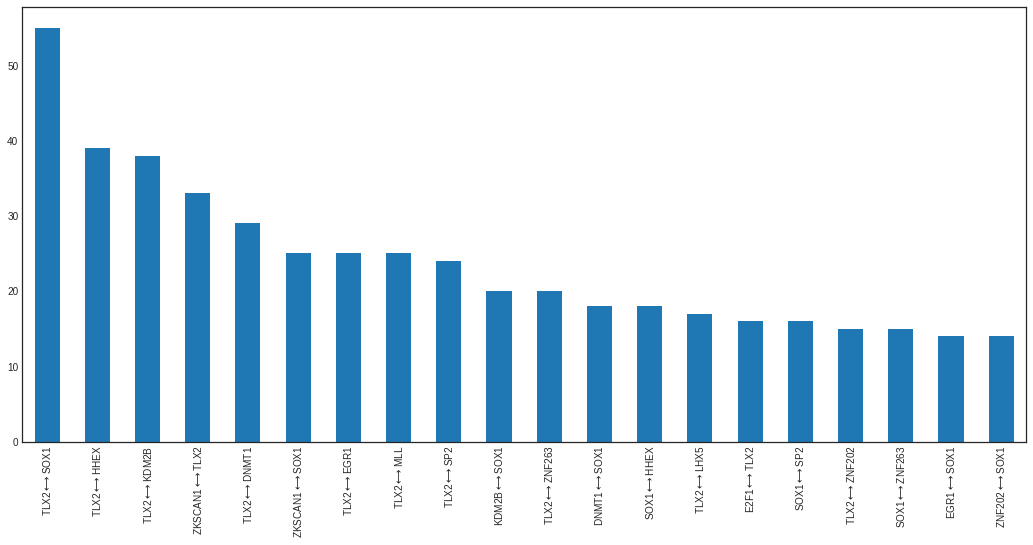

In [24]:
df['TF_interaction'].value_counts()[:20].plot(kind='bar', figsize=(18,8))

### Distribution of mean distance of interaction

Text(0.5, 1.0, 'Distribution of motif interaction distances')

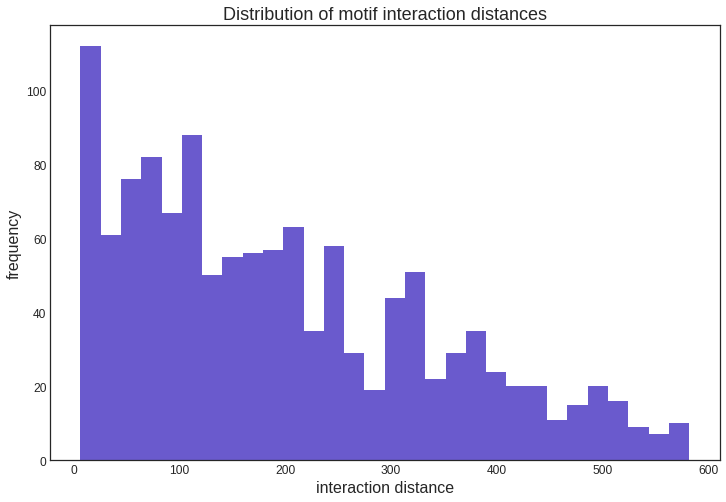

In [25]:
ax = df['mean_distance'].plot(kind='hist',bins=30, figsize=(12,8),color='slateblue',fontsize=12)
ax.set_xlabel("interaction distance",fontsize=16)
ax.set_ylabel("frequency",fontsize=16)
ax.xaxis.set_tick_params(rotation=0)
ax.set_title('Distribution of motif interaction distances',fontsize=18)

In [26]:
df['mean_distance'].mean(),df['mean_distance'].median()

(197.5600322320709, 168.0)

### Most Frequent TF Family Interactions

In [27]:
tf_family_dict = {}
for TF in df_annotate['TF_Name']:
    tf_family_dict[TF] = df_annotate[df_annotate['TF_Name']==TF]['Family_Name'].iloc[0]

In [28]:
df['TF1_Family'] = df['TF1'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')
df['TF2_Family'] = df['TF2'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')

In [29]:
df.head(10)

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction,TF1_Family,TF2_Family
0,0,filter3<-->filter4,594,M0408_1.02,0.00457,M4536_1.02,0.000552,126.0,462.0,847.0,862.0,2.045164e-03,2.507269e-03,ZKSCAN1,E2F1,ZKSCAN1$\longleftrightarrow$E2F1,C2H2 ZF,E2F
1,2,filter3<-->filter11,601,M0408_1.02,0.00457,M1545_1.02,0.000134,48.0,6.0,479.0,1207.0,2.288783e-03,2.795971e-03,ZKSCAN1,GMEB1,ZKSCAN1$\longleftrightarrow$GMEB1,C2H2 ZF,SAND
2,3,filter3<-->filter12,602,M0408_1.02,0.00457,M0891_1.02,0.000487,126.0,504.0,1113.0,1177.0,1.056031e-06,1.657928e-06,ZKSCAN1,TLX2,ZKSCAN1$\longleftrightarrow$TLX2,C2H2 ZF,Homeodomain
3,5,filter3<-->filter21,611,M0408_1.02,0.00457,M0609_1.02,0.009532,390.0,120.0,1293.0,1115.0,3.085270e-02,3.471139e-02,ZKSCAN1,DNMT1,ZKSCAN1$\longleftrightarrow$DNMT1,C2H2 ZF,CxxC
4,6,filter3<-->filter23,613,M0408_1.02,0.00457,M0891_1.02,0.020195,360.0,78.0,1302.0,1585.0,2.299860e-08,4.070349e-08,ZKSCAN1,TLX2,ZKSCAN1$\longleftrightarrow$TLX2,C2H2 ZF,Homeodomain
5,7,filter3<-->filter24,614,M0408_1.02,0.00457,M0891_1.02,0.020530,108.0,300.0,1277.0,1442.0,7.914717e-21,3.643240e-20,ZKSCAN1,TLX2,ZKSCAN1$\longleftrightarrow$TLX2,C2H2 ZF,Homeodomain
6,8,filter3<-->filter25,615,M0408_1.02,0.00457,M1592_1.02,0.001907,48.0,216.0,1324.0,1806.0,2.563729e-05,3.621497e-05,ZKSCAN1,SOX3,ZKSCAN1$\longleftrightarrow$SOX3,C2H2 ZF,Sox
7,10,filter3<-->filter33,623,M0408_1.02,0.00457,M0404_1.02,0.013770,108.0,306.0,992.0,1085.0,1.573445e-08,2.810014e-08,ZKSCAN1,ZNF202,ZKSCAN1$\longleftrightarrow$ZNF202,C2H2 ZF,C2H2 ZF
8,11,filter3<-->filter36,626,M0408_1.02,0.00457,M0608_1.02,0.008195,132.0,120.0,905.0,931.0,1.849598e-02,2.116096e-02,ZKSCAN1,MLL,ZKSCAN1$\longleftrightarrow$MLL,C2H2 ZF,CxxC
9,14,filter3<-->filter46,636,M0408_1.02,0.00457,M4463_1.02,0.001500,78.0,186.0,1252.0,1729.0,1.051020e-12,2.606403e-12,ZKSCAN1,IRF4,ZKSCAN1$\longleftrightarrow$IRF4,C2H2 ZF,IRF


In [30]:
df.shape

(1241, 18)

In [31]:
df['Family_Interaction'] = df.apply(lambda x: x['TF1_Family']+r'$\longleftrightarrow$'+x['TF2_Family'],axis=1)

In [32]:
all_interactions_dict = []
for i in range(df.shape[0]):
    TF1 = df['TF1_Family'][i]
    TF2 = df['TF2_Family'][i]
    TF_intr = TF1+r'$\longleftrightarrow$'+TF2
    TF_intr_rev = TF2+r'$\longleftrightarrow$'+TF1
    if TF_intr not in all_interactions_dict and TF_intr_rev not in all_interactions_dict:
        all_interactions_dict.append(TF_intr)
    elif TF_intr in all_interactions_dict:
        df['Family_Interaction'][i] = TF_intr
    elif TF_intr_rev in all_interactions_dict:
        df['Family_Interaction'][i] = TF_intr_rev

/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [33]:
df.head()

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction,TF1_Family,TF2_Family,Family_Interaction
0,0,filter3<-->filter4,594,M0408_1.02,0.00457,M4536_1.02,0.000552,126.0,462.0,847.0,862.0,2.045164e-03,2.507269e-03,ZKSCAN1,E2F1,ZKSCAN1$\longleftrightarrow$E2F1,C2H2 ZF,E2F,C2H2 ZF$\longleftrightarrow$E2F
1,2,filter3<-->filter11,601,M0408_1.02,0.00457,M1545_1.02,0.000134,48.0,6.0,479.0,1207.0,2.288783e-03,2.795971e-03,ZKSCAN1,GMEB1,ZKSCAN1$\longleftrightarrow$GMEB1,C2H2 ZF,SAND,C2H2 ZF$\longleftrightarrow$SAND
2,3,filter3<-->filter12,602,M0408_1.02,0.00457,M0891_1.02,0.000487,126.0,504.0,1113.0,1177.0,1.056031e-06,1.657928e-06,ZKSCAN1,TLX2,ZKSCAN1$\longleftrightarrow$TLX2,C2H2 ZF,Homeodomain,C2H2 ZF$\longleftrightarrow$Homeodomain
3,5,filter3<-->filter21,611,M0408_1.02,0.00457,M0609_1.02,0.009532,390.0,120.0,1293.0,1115.0,3.085270e-02,3.471139e-02,ZKSCAN1,DNMT1,ZKSCAN1$\longleftrightarrow$DNMT1,C2H2 ZF,CxxC,C2H2 ZF$\longleftrightarrow$CxxC
4,6,filter3<-->filter23,613,M0408_1.02,0.00457,M0891_1.02,0.020195,360.0,78.0,1302.0,1585.0,2.299860e-08,4.070349e-08,ZKSCAN1,TLX2,ZKSCAN1$\longleftrightarrow$TLX2,C2H2 ZF,Homeodomain,C2H2 ZF$\longleftrightarrow$Homeodomain


In [34]:
#df.to_csv('Human-promoter_all_significant_TFs.csv')

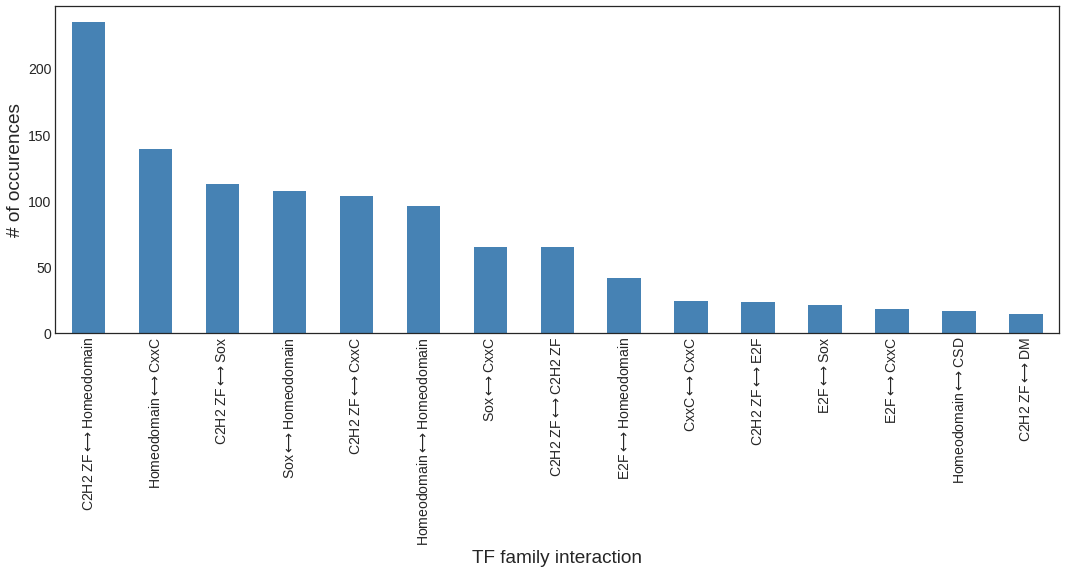

In [35]:
ax = df['Family_Interaction'].value_counts()[:15].plot(kind='bar',color='steelblue',figsize=(18,6),fontsize=14)
ax.set_xlabel("TF family interaction",fontsize=19)
ax.set_ylabel("# of occurences",fontsize=19)
ax.xaxis.set_tick_params(rotation=90)
#ax.set_title('Top interacting families of transcription factors',fontsize=18)
plt.savefig('Family_interactions_Human.pdf',bbox_inches='tight')

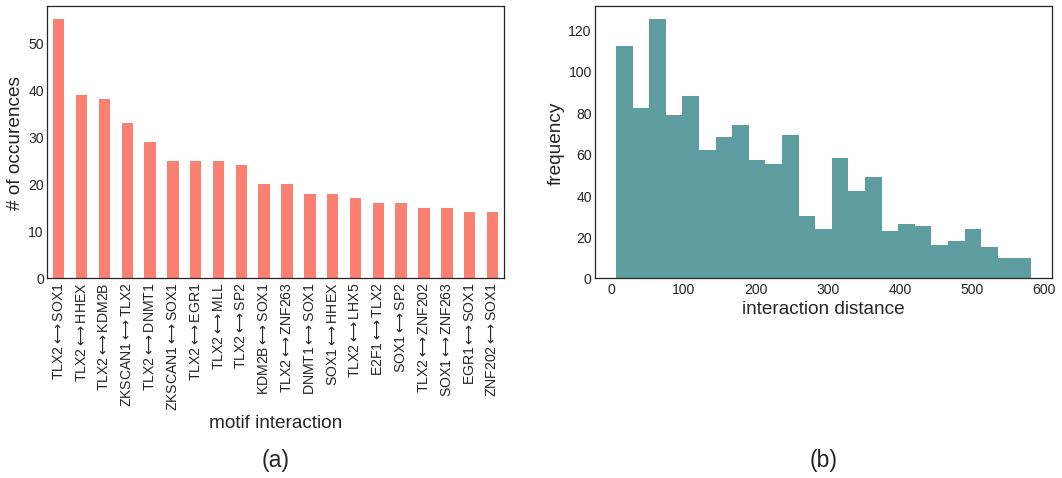

In [36]:
fig, axes = plt.subplots(1, 2)
ax1 = df['TF_interaction'].value_counts()[:20].plot(kind='bar',color='salmon',figsize=(18,5),fontsize=14,ax=axes[0])
ax1.set_xlabel("motif interaction",fontsize=19)
ax1.set_ylabel("# of occurences",fontsize=19)
ax1.xaxis.set_tick_params(rotation=90)
#ax1.set_title('Most frequent interactions',fontsize=16)

ax2 = df['mean_distance'].plot(kind='hist',bins=25, figsize=(18,5),color='cadetblue',fontsize=14,ax=axes[1])
ax2.set_xlabel("interaction distance",fontsize=19)
ax2.set_ylabel("frequency",fontsize=19)
ax2.xaxis.set_tick_params(rotation=0)
#ax2.set_title('Distribution of motif interaction distances',fontsize=16)

ax1.text(0.5,-0.69, "(a)", size=23, ha="center", 
         transform=ax1.transAxes)
ax2.text(0.5,-0.69, "(b)", size=23, ha="center", 
         transform=ax2.transAxes)
#df_list[count].plot(ax=axes[1,1])
plt.savefig('Main_Human.pdf',bbox_inches='tight')

In [37]:
len(df['TF_interaction'].value_counts()),np.median(df['TF_interaction'].value_counts())

(285, 2.0)